<a href="https://colab.research.google.com/github/hectorpilo/bootcamp-ds-sonda/blob/main/SimulacionCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulación del Examen**
limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

**Diccionario de Datos**

* user_id: Identificación única del usuario.
* app_version: Versión de la aplicación usada.
* platform: Plataforma del dispositivo (Android, iOS).
* session_duration: Duración de la sesión en minutos.
* number_of_sessions: Número de sesiones en un día.
* country: País del usuario.
* user_feedback: Puntuación de la experiencia del usuario (1-5).

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = "/content/drive/MyDrive/BBDD/user_app_data.csv" #carga del archivo y creacion de un DF en pandas.
df = pd.read_csv(path)
#miraremos las primeras filas, para ver que los datos se han cargado correctamente.
df.head(10)

Mounted at /content/drive


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
5,6,1.3,Android,55,9,Germany,4
6,7,1.0,iOS,168,3,Mexico,2
7,8,1.0,iOS,52,1,Canada,4
8,9,1.2,iOS,144,16,USA,1
9,10,1.1,iOS,13,6,France,2


# **Limpieza de Datos**

In [2]:
#información general del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [3]:
# Verifica si hay filas completamente duplicadas
df.duplicated().sum()

np.int64(0)

In [4]:
# Verifica si hay IDs de usuario duplicados
df['user_id'].duplicated().sum()

np.int64(0)

In [5]:
# Ver cuántos valores nulos hay por columna
df.isnull().sum()

,0
user_id,0
app_version,0
platform,0
session_duration,0
number_of_sessions,0
country,0
user_feedback,0


In [6]:
# Porcentaje de valores nulos por columna
(df.isnull().sum() / len(df)) * 100

,0
user_id,0.0
app_version,0.0
platform,0.0
session_duration,0.0
number_of_sessions,0.0
country,0.0
user_feedback,0.0


In [8]:
#encontrando incosistencias en valores categoricos.
print(df['platform'].unique())
print(df['country'].unique())

['Android' 'iOS']
['France' 'UK' 'Canada' 'Germany' 'Mexico' 'USA' 'Spain' 'Italy']


In [9]:
#normalizar valores categoricos
# Limpiar 'platform'
df['platform'] = df['platform'].str.strip().str.lower()

# Limpiar 'country' (opcionalmente puede usarse .str.upper() si prefieres ISO 2 letras)
df['country'] = df['country'].str.strip().str.title()

# **Exploración de Datos - Exploratorias Univariantes**

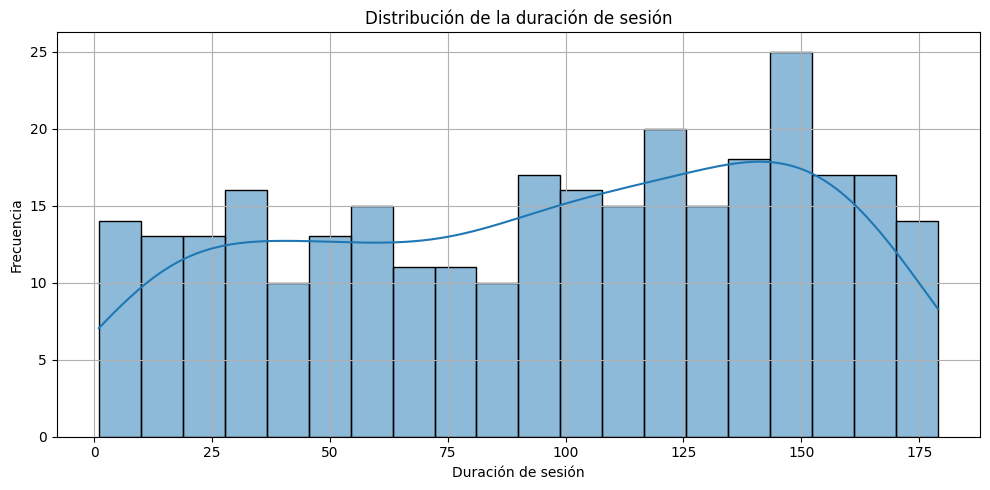

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['session_duration'], bins=20, kde=True)
plt.title('Distribución de la duración de sesión')
plt.xlabel('Duración de sesión')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

**Comentarios**
* El histograma muestra la distribución de los tiempos de sesión.
* La mayoría de los usuarios tiene sesiones cortas.
* La cola a la derecha indica algunos usuarios con tiempos mucho más altos (asimetría positiva).

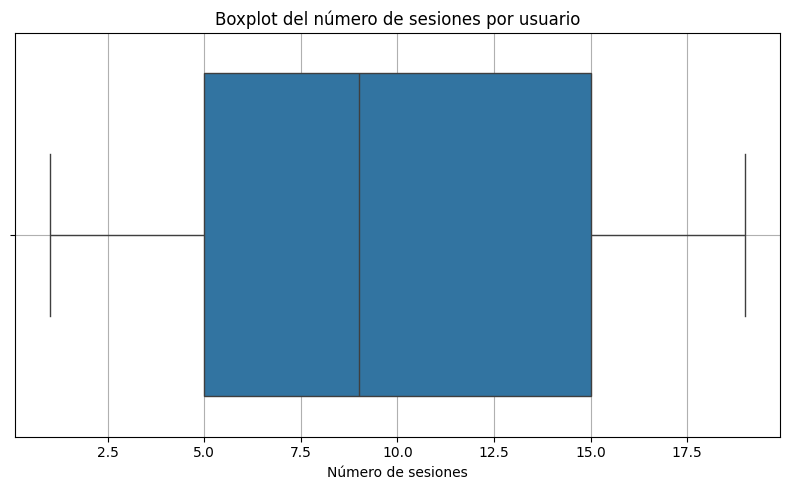

In [11]:
#GRAFICO SCATTER
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['number_of_sessions'])
plt.title('Boxplot del número de sesiones por usuario')
plt.xlabel('Número de sesiones')
plt.grid(True)
plt.tight_layout()
plt.show()

**Comentarios**
* La mayoría de los usuarios tienen entre 5 y 15 sesiones.
* No se identifican comportamientos anómalos.
* La distribución es ligeramente simétrica, lo cual sugiere un comportamiento de uso relativamente homogéneo entre usuarios.

# **Exploración de Datos - Exploratorias Multi-variantes**

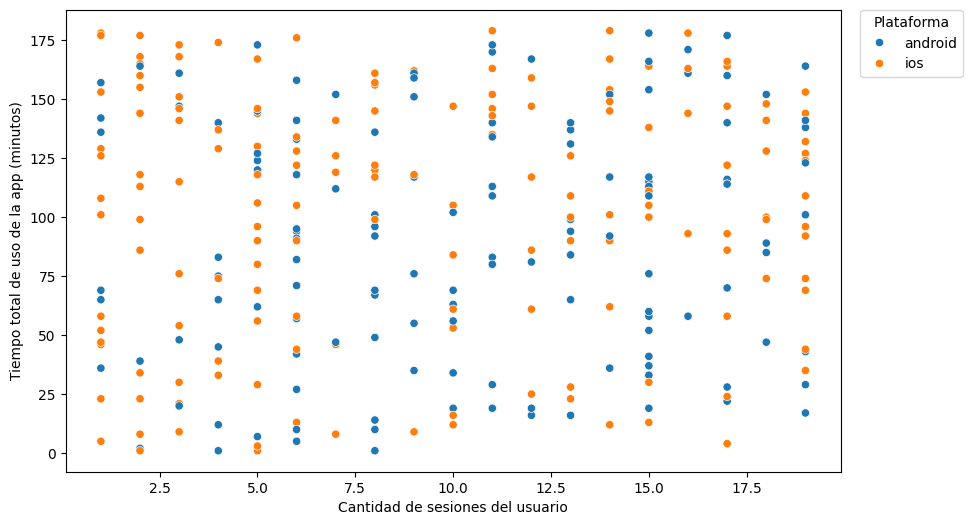

In [22]:
#GRAFICO DE DISPERCIÓN

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_sessions', y='session_duration', hue='platform')

# Cambiar etiquetas de los ejes
plt.xlabel('Cantidad de sesiones del usuario')        # Nuevo label para eje X
plt.ylabel('Tiempo total de uso de la app (minutos)') # Nuevo label para eje Y

plt.legend(title='Plataforma', bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0)


**Comentarios**

* Hay una tendencia general de que a mayor número de sesiones, mayor duración total.
* Tiene sentido: si un usuario abre la app muchas veces, es probable que acumule más tiempo de uso.

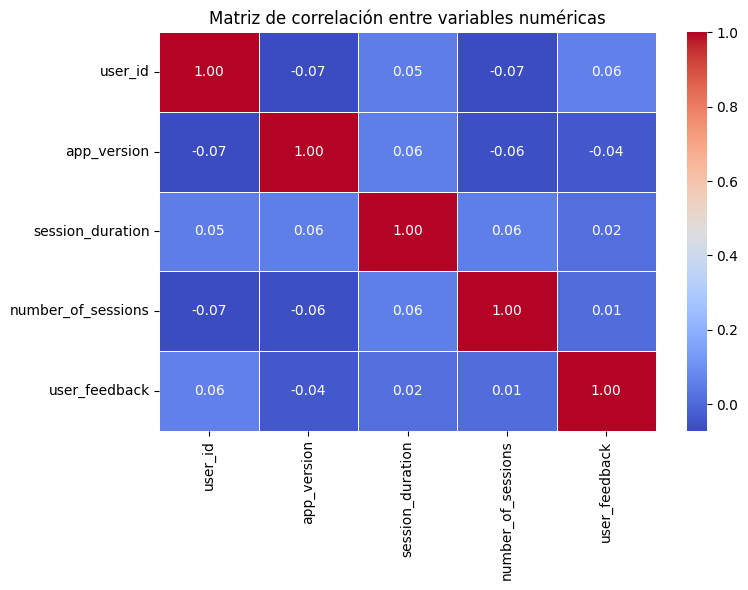

In [24]:
#MAPA DE CALOR

import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


**Comentarios**
* Se observa una correlación positiva entre session_duration y number_of_sessions, como era de esperarse.
